In [1]:
#Import Library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.impute import SimpleImputer

In [2]:
#Import the dataset from SQL
conn = sqlite3.connect('Zoopla_data.sqlite') #Connect to the database
dataset = pd.read_sql_query('SELECT * FROM Zoopla',con=conn)
conn.close() # Close connection to database
dataset = np.array(dataset)[:,1:] # Turn Database to array and remove id column

In [3]:
# Label encode the property type
from sklearn.preprocessing import LabelEncoder
p_type = dataset[:, 9]
le = LabelEncoder()
p_type = le.fit_transform(p_type)
dataset[:,9] = p_type.astype(int)

In [4]:
# Describe data for insight
Data_pd = pd.DataFrame(dataset, columns= ['Price','Beds','Baths','Loft','Garden','Station_distance','Listing_year','Latitude','Longtitude','Property_type']).astype(float)
Data_pd.describe(include='all') 

,Price,Beds,Baths,Loft,Garden,Station_distance,Listing_year,Latitude,Longtitude,Property_type
count,2.763000e+03,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000
mean,1.924094e+05,2.626945,1.341515,0.102425,0.558813,0.680080,2019.830360,53.428248,-2.951564,10.001810
std,1.713327e+05,1.176078,0.630333,0.303261,0.496619,1.122861,0.503769,0.047395,0.053156,4.344797
min,8.000000e+03,1.000000,1.000000,0.000000,0.000000,0.000000,2015.000000,53.323982,-3.080982,0.000000
25%,1.000000e+05,2.000000,1.000000,0.000000,0.000000,0.300000,2020.000000,53.398526,-2.984369,7.000000
50%,1.500000e+05,3.000000,1.000000,0.000000,1.000000,0.500000,2020.000000,53.412268,-2.958739,7.000000
75%,2.200000e+05,3.000000,1.341515,0.000000,1.000000,0.800000,2020.000000,53.461991,-2.917125,14.000000
max,3.000000e+06,9.000000,6.000000,1.000000,1.000000,34.300000,2020.000000,53.567591,-2.662128,17.000000


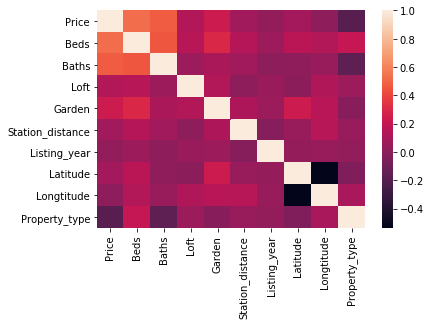

In [5]:
# Get correlation map of data9
corr = Data_pd.corr()
sns.heatmap(corr)

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

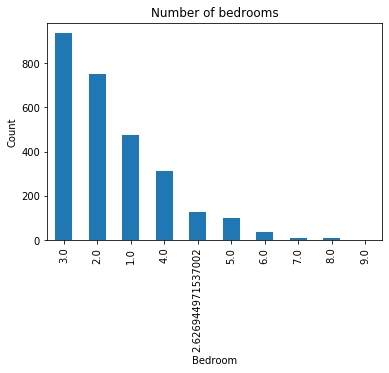

In [6]:
#Determine the most common house bedroom wise
Data_pd['Beds'].value_counts().plot(kind='bar')
plt.title('Number of bedrooms')
plt.xlabel('Bedroom')
plt.ylabel('Count')
sns.despine

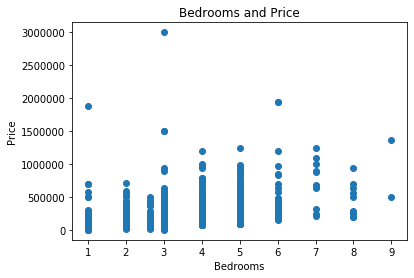

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [7]:
# Determine the relationship between price and bedrooms
plt.scatter(Data_pd['Beds'], Data_pd['Price'])
plt.title("Bedrooms and Price")
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()
sns.despine

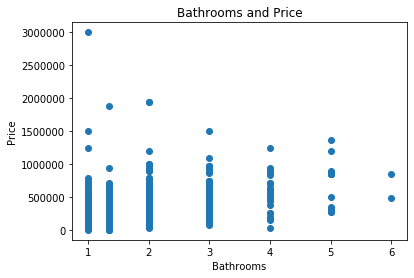

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [8]:
# Determine the relationship between price and bathrooms
plt.scatter(Data_pd['Baths'], Data_pd['Price'])
plt.title("Bathrooms and Price")
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()
sns.despine

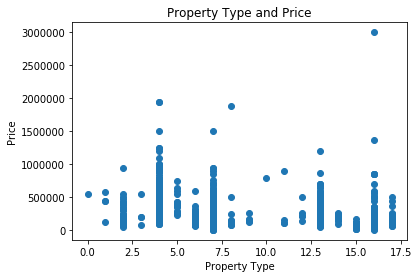

['barn_conversion' '0' 'block_of_flats' '1' 'bungalow' '2' 'cottage' '3'
 'detached' '4' 'detached_bungalow' '5' 'end_terrace' '6' 'flat' '7'
 'land' '8' 'link_detached' '9' 'lodge' '10' 'maisonette' '11' 'mews' '12'
 'semi_detached' '13' 'semi_detached_bungalow' '14' 'studio' '15'
 'terraced' '16' 'town_house' '17']


In [9]:
# Relationship between price and property type
plt.scatter(Data_pd['Property_type'], Data_pd['Price'])
plt.title("Property Type and Price")
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

# Create 
def countList(lst1, lst2): 
    return np.array([[i, j] for i, j in zip(lst1, lst2)]).ravel()

lst11 = list(le.classes_)
lst12 = list(range(26))
print(countList(lst11,lst12))

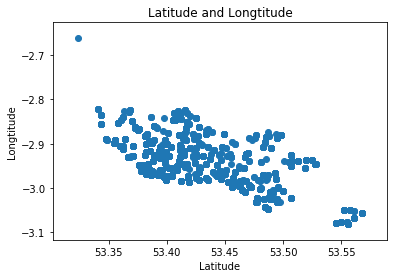

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [10]:
# Determine the relationship between lattitude and longtitude
plt.scatter(Data_pd['Latitude'], Data_pd['Longtitude'])
plt.title("Latitude and Longtitude")
plt.xlabel('Latitude')
plt.ylabel('Longtitude')
plt.show()
sns.despine

In [11]:
#Feature extraction
# Features = ['Beds','Baths','Loft','Garden','Station_distance','Listing_year','Latitude','Longtitude']#0.0869

Features = ['Beds','Baths','Loft','Garden','Station_distance','Listing_year','Latitude','Longtitude','Property_type'] #0.1067

X = Data_pd[Features].astype(float)
y = Data_pd['Price'].astype(float)

In [12]:
#Split dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [13]:
#Create Decsion regression model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 2)
regressor.fit(X_train, y_train)
#Predict test results & compute accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = np.round(regressor.predict(X_test),)
y_test = y_test.astype(int)
accuracy_score(y_test, y_pred2, normalize=True)

0.10669077757685352

In [14]:
# Random forest
from sklearn.ensemble import RandomForestRegressor
regressor2 = RandomForestRegressor(n_estimators = 100, random_state = 2)
regressor2.fit(X_train, y_train)
#Predict new results
y_pred3 = np.round(regressor2.predict(X_test),-3)
accuracy_score(y_test, y_pred3, normalize=True)

0.0108499095840868

In [15]:
# Support Vector Regression
from sklearn.svm import SVR
regressor3 = SVR(kernel = 'linear')
regressor3.fit(X_train, y_train)
#Predict new results
y_pred4 = np.round(regressor3.predict(X_test),-3)
accuracy_score(np.round(y_test), y_pred4, normalize=True)

0.0054249547920434

In [16]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
# Predict new results
y_pred5 = np.round(lin_reg_2.predict(poly_reg.fit_transform(X_test)),-3)
accuracy_score(y_test, y_pred5, normalize=True)

0.003616636528028933

In [17]:
#Create linear regression model
reg = LinearRegression().fit(X_train,y_train)
#Predict test results & compute accuracy
y_pred = np.round(reg.predict(X_test),-3)
y_pred = abs(y_pred)
accuracy_score(y_test, y_pred.round(), normalize=True)

0.0018083182640144665